# Introducción: Programando en Qiskit

En este notebook estudiaremos los fundamentos de la programación en Qiskit desde cero, aplicando los conocimientos previos sobre computación cuántica y circuitos cuánticos.

### ¿Qué es Qiskit?

Qiskit es una librería open-source ampliamente utilizada en el campo de la computación cuántica, que ofrece:
- Un amplio conjunto de aplicaciones y primitivas ya implementadas
- Flexibilidad para crear nuevas implementaciones desde cero
- Capacidad de ejecución tanto en simuladores como en dispositivos cuánticos reales
- Documentación extensa y una comunidad activa

Aunque existen otros frameworks como Cirq, PennyLane, myQLM o Q#, Qiskit suele destacar como la opción más recomendable para iniciarse debido a su documentación completa (aunque tenéis que tener mucho cuidado con ella, porque suele estar desactualizada o ser de difícil acceso/utilización), amplia adopción en la industria y abundantes recursos educativos (aunque muchos desactualizados). Otra opción alternativa de gran interés es CudaQ, que veremos en un futuro.

### Versión utilizada

**Importante:** Este notebook utiliza Qiskit 2.2.x. Esta versión introdujo cambios significativos que hacen que gran parte del código y tutoriales anteriores sean incompatibles. Asegúrate de usar esta versión o superior para seguir correctamente los ejemplos.

### Alcance del notebook

Nos centraremos específicamente en:
- Construcción de circuitos cuánticos
- Ejecución y medición de circuitos
- Visualización de resultados

Ten en cuenta que Qiskit ofrece muchas más funcionalidades avanzadas. Para explorar todo su potencial, visita: https://www.ibm.com/quantum/qiskit

## Instalación de librerías

Lo primero que haremos será instalar las librerías que necesitamos:

- Qiskit: para crear los circuitos
- Qiskit_ibm_runtime: para ejecutar los circuitos
- Matplotlib: para mejorar las visualizaciones
- Pylatexenc: para visualizar de manera correcta ciertas partes

Para ello, crea un venv en Python 3.12.10 y usa el requirements para instalar.

Comprobamos nuestra versión. Esto es importante, ya que siempre debemos especificar qué versión estamos usando al desarrollar software. Esto es porque Qiskit suele deprecar muchas funciones cada par de meses, volviendo muchos programas inservibles.

In [1]:
import qiskit
qiskit.__version__

'2.2.3'

---
# Cómo crear un circuito cuántico

Vamos a empezar aprendiendo cómo hacer un circuito cuántico. Primero tenemos que crear el objeto de circuito, en el cual tendremos todos los qubits necesarios y todos los métodos que necesitaremos para definir las operaciones a realizar. Tras ello, definiremos las operaciones a realizar en cada paso.

La documentación de QuantumCircuit:

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit

Y un paper:

https://arxiv.org/abs/2405.08810

In [2]:
from qiskit import QuantumCircuit

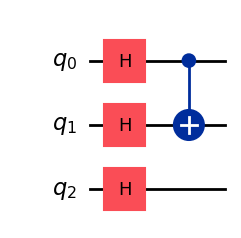

In [3]:
# Creamos el circuito cuántico de 3 qubits
qc = QuantumCircuit(3)

# Añadimos una puerta H en cada qubit y una CNOT entre los dos primeros
# Las puertas básicas se suelen añadir como métodos
qc.h(0)  # Qubit objetivo
qc.h(1)
qc.h(2)
qc.cx(0, 1)  # Qubit control y qubit objetivo

# Dibujamos el circuito
qc.draw('mpl')  # El 'mpl' es para que sea bonito

Vemos que los qubits van de arriba a abajo.

La lógica de las puertas es:

circuito_cuantico.nombre_de_la_puerta(qubit_objetivo)

En caso de ser controladas:
circuito_cuantico.nombre_de_la_puerta(qubit_control, qubit_objetivo)


### Ejercicio

Crea el circuito de la imagen

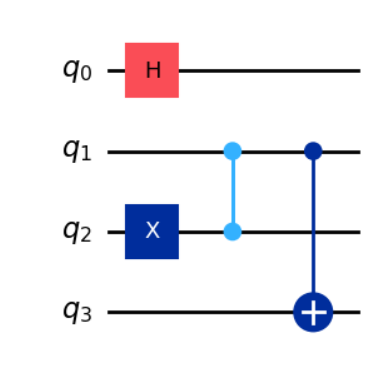

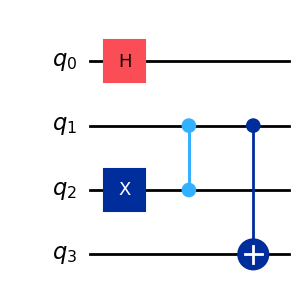

In [4]:
qc = QuantumCircuit(4)

qc.x(2)
qc.h(0)
qc.cz(1,2)
qc.cx(1,3)

qc.draw('mpl')

## Registros

Sin embargo, cuando tengamos un mayor número de qubits, o de conjuntos de qubits que queramos tener separados, necesitaremos poder darle nombre a los mismos. Para ello existen los registros.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister

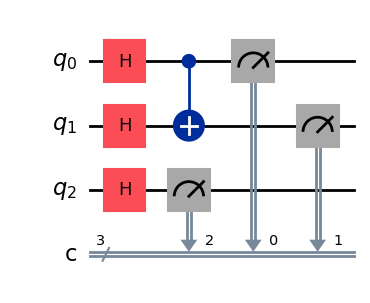

In [7]:
#Creamos un registro cuántico de 3 qubits con un cierto nombre
qr = QuantumRegister(3, name='q')
#Creamos un registro clásico de 3 bits, para guardar las mediciones de los qubits
cr = ClassicalRegister(3, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,1)

#Vamos a añadir una medición para cada qubit, registrada en cada bit clásico
qc.measure(0,0)#qubit, cbit
qc.measure(1,1)
qc.measure(2,2)

#Dibujamos el circuito
qc.draw('mpl')

### Ejercicio

Crea el siguiente circuito.

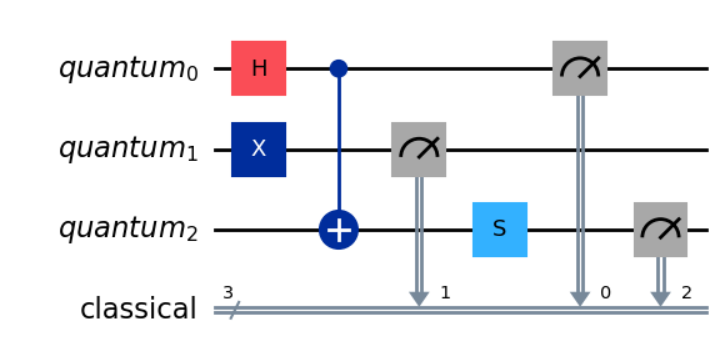

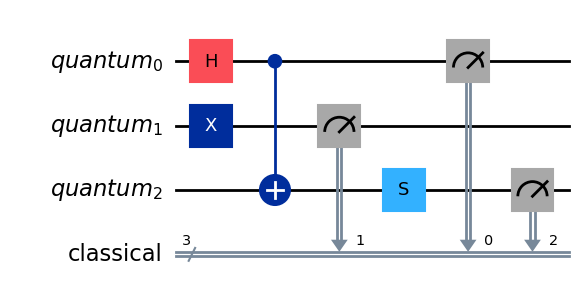

In [8]:
qr = QuantumRegister(3, name='quantum')
cr = ClassicalRegister(3, name='classical')

qc = QuantumCircuit(qr, cr, name='Circuit')

qc.h(0)
qc.x(1)
qc.cx(0,2)
qc.s(2)

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

#Dibujamos el circuito
qc.draw('mpl')

## Multiples registros y barreras

Vemos que obtenemos un circuito en el cual medimos cada qubit y lo registramos en un registro clásico. Sin embargo, podemos considerar el caso en el cual queremos llamar a los qubits según el registro en el que estén (teniendo 2 registros, por ejemplo). En este caso haremos una pequeña modificación. Además, haremos que quede algo más bonito.

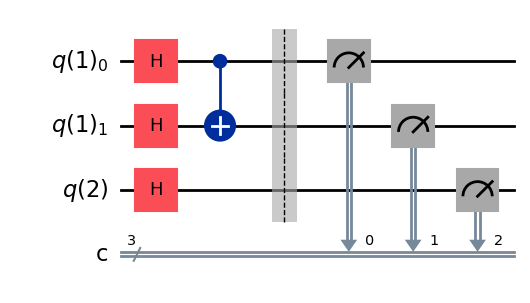

In [9]:
#Creamos un registro cuántico de 2 qubits con un cierto nombre
qr1 = QuantumRegister(2, name='q(1)')
#Creamos un registro cuántico de 1 qubit con un cierto nombre
qr2 = QuantumRegister(1, name='q(2)')
#Creamos un registro clásico de 3 bits, para guardarlas mediciones de los qubits
cr = ClassicalRegister(3, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h(qr1[0])#Aplicado al qubit 0 del registro 1
qc.h(qr1[1])
qc.h(qr2[0])
qc.cx(qr1[0],qr1[1])

#Añadimos una barrera para separar las puertas
qc.barrier()#Podemos indicar los qubits a los que afecta la barrera o dejarlo para que sean todos

#Vamos a añadir una medición para cada qubit, registrada en cada bit clásico
qc.measure(qr1[0],0)
qc.measure(qr1[1],1)
qc.measure(qr2[0],2)

#Dibujamos el circuito
qc.draw('mpl')

### Ejercicio

Haz el siguiente circuito.

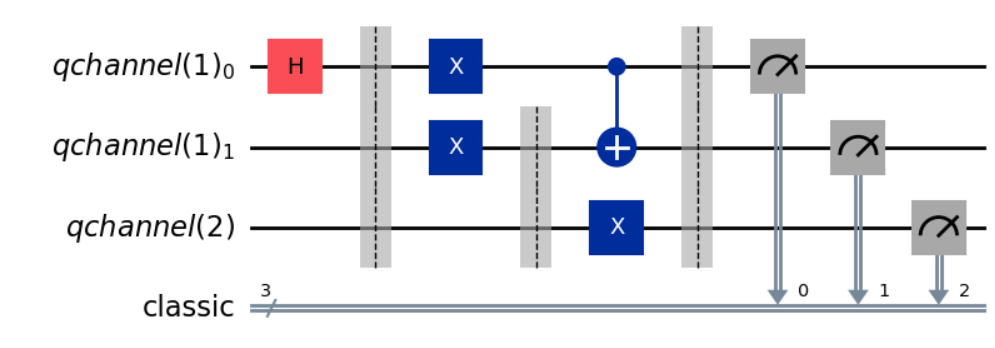

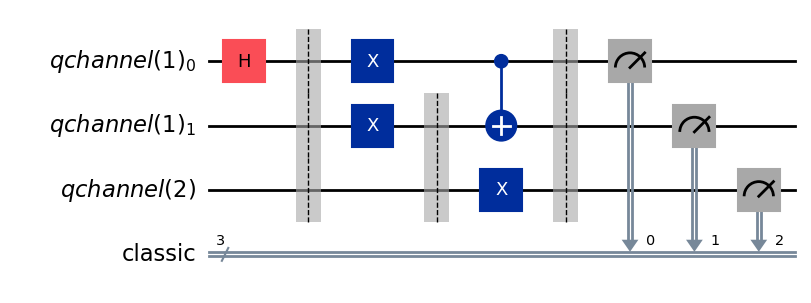

In [10]:
qr1 = QuantumRegister(2, name='qchannel(1)')
qr2 = QuantumRegister(1, name='qchannel(2)')
cr = ClassicalRegister(3, name='classic')

qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

qc.h(0)
qc.barrier()

qc.x(qr1[0])
qc.x(qr1[1])
qc.barrier([1,2])
qc.x(qr2[0])
qc.cx(qr1[0],qr1[1])

qc.barrier()

qc.measure(qr1[0],0)
qc.measure(qr1[1],1)
qc.measure(qr2[0],2)

qc.draw('mpl')

## Puertas múltiples

Ahora bien, si queremos aplicar la misma puerta a varios qubits a la vez, solo tendremos que pasarle todos estos como una lista. Podemos hacer lo mismo con las puertas controladas, pero todos los controles van juntos y todos los objetivos también.

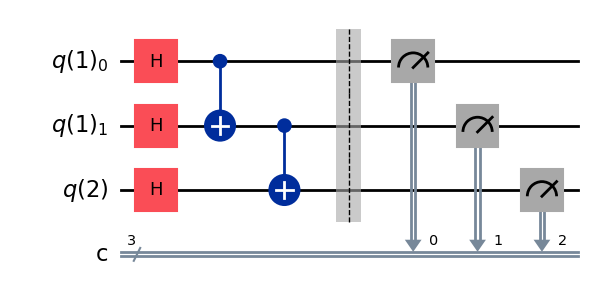

In [11]:
#Creamos un registro cuántico de 2 qubits con un cierto nombre
qr1 = QuantumRegister(2, name='q(1)')
#Creamos un registro cuántico de 1 qubit con un cierto nombre
qr2 = QuantumRegister(1, name='q(2)')
#Creamos un registro clásico de 3 bits, para guardarlas mediciones de los qubits
cr = ClassicalRegister(3, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h([qr1[0],qr1[1],qr2[0]])
qc.cx([qr1[0],qr1[1]],[qr1[1],qr2[0]])

#Añadimos una barrera para separar las puertas
qc.barrier()#Podemos indicar los qubits a los que afecta la barrera o dejarlo para que sean todos

#Vamos a añadir una medición para cada qubit, registrada en cada bit clásico
qc.measure(qr1[:]+qr2[:],cr)#Podemos llamar a todos los qubits del registro con [:] como lista

#Dibujamos el circuito
qc.draw('mpl')

### Ejercicio

Construye el siguiente circuito con el menor número de líneas que puedas.

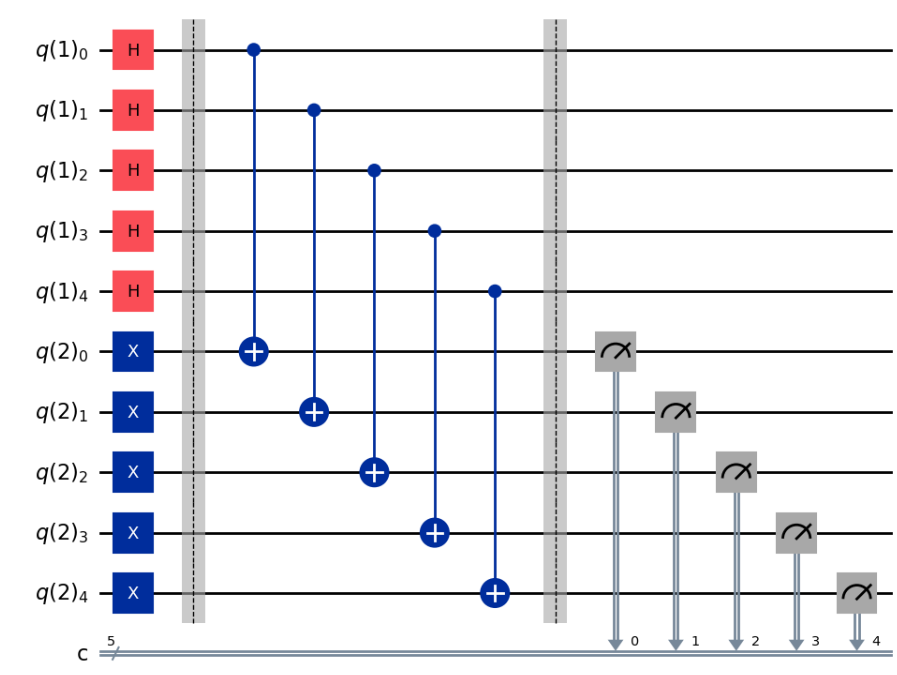

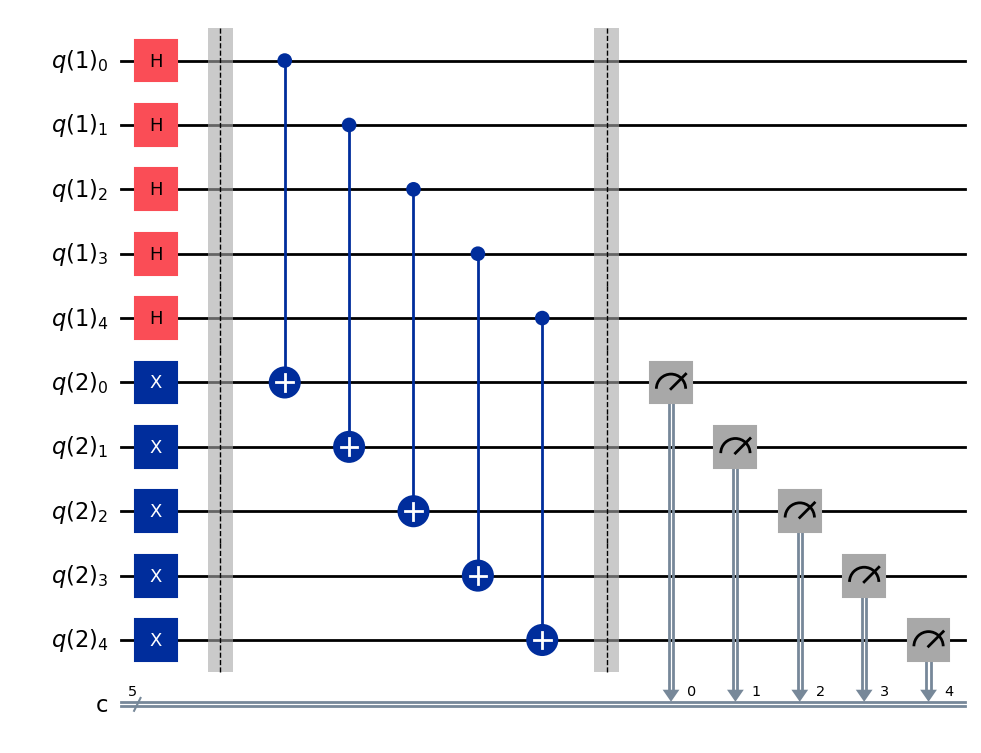

In [12]:
#Creamos un registro cuántico de 2 qubits con un cierto nombre
qr1 = QuantumRegister(5, name='q(1)')
#Creamos un registro cuántico de 1 qubit con un cierto nombre
qr2 = QuantumRegister(5, name='q(2)')
#Creamos un registro clásico de 3 bits, para guardarlas mediciones de los qubits
cr = ClassicalRegister(5, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h(qr1[:])
qc.x(qr2[:])
qc.barrier()
qc.cx(qr1[:],qr2[:])

qc.barrier()

qc.measure(qr2[:],cr)

#Dibujamos el circuito
qc.draw('mpl')

## Más información sobre puertas

Aquí tenemos una lista de las puertas que existen: https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit

No unitarias:

* initialize()	Inicializa a un cierto vector
* reset()	Resetea el qubit

Unitarias:

* h()	HGate
* id()	IGate
* iswap()	iSwapGate
* p()	PhaseGate
* pauli()	PauliGate
* prepare_state()	StatePreparation
* r()	RGate
* rx()	RXGate
* rxx()	RXXGate
* ry()	RYGate
* ryy()	RYYGate
* rz()	RZGate
* rzx()	RZXGate
* rzz()	RZZGate
* s()	SGate
* swap()	SwapGate
* t()	TGate
* u()	UGate
* unitary()	UnitaryGate
* x()	XGate
* y()	YGate
* z()	ZGate

Para los dagger, muchas veces llega con poner dg detrás del nombre (sdg())

Multicontroladas:



* mcp()	PhaseGate
* mcrx()	RXGate
* mcry()	RYGate
* mcrz()	RZGate
* mcx()	XGate





Si en algún momento necesitamos copiar el circuito, podemos usar circuit.copy(name=nombre_nuevo), y si solo queremos la estructura, pero no las puertas podemos usar circuit.copy_empty_like().

Si necesitamos añadir qubits: .add_qubits()

Para registros: .add_register()

En caso de necesitar añadir cosas extrañas al circuito, podemos utilizar el circuit.append(instruccion, qubits, cbits)

Si queremos juntar dos circuitos, podemos usar circuit.compose(otro_circuito, qubits, cbits, inplace=False)

Si se pone inplace = True, no devuelve nada, porque modifica el circuito original directamente.

Para crear una instrucción desde un circuito, si usa solo qubits, podemos usar .to_gate(), mientras que si tiene también registro clásico, necesitamos .to_instruction()

---
# Circuitos condicionales

Queremos hacer circuitos cuánticos híbridos, en los cuales partes cuánticas del circuito dependerán de resultados clásicos. Para ello usaremos métodos condicionales.

## If

Queremos aplicar una puerta si hemos obtenido cierto resultado en una medición.

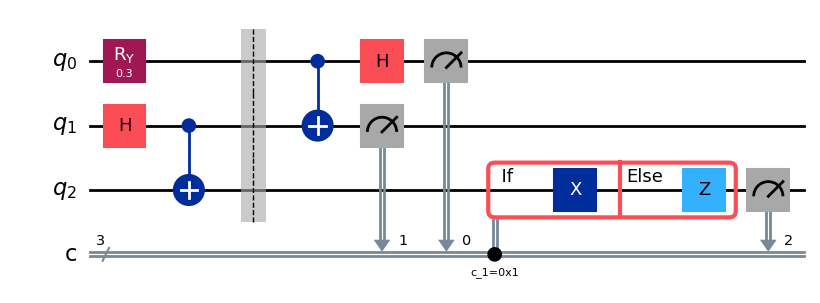

In [13]:
#Creamos el circuito
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

qc = QuantumCircuit(qr, cr, name='Circuit')
#Puertas
qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit objetivo
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])

#Si el valor en cr[1] es 1, aplicamos una puerta x en el 2, sino, una z
with qc.if_test((cr[1], 1)) as else_:
    qc.x(2)
with else_:
    qc.z(2)

qc.measure(2,2)

qc.draw('mpl')

### Ejercicio

Construye el siguiente circuito.

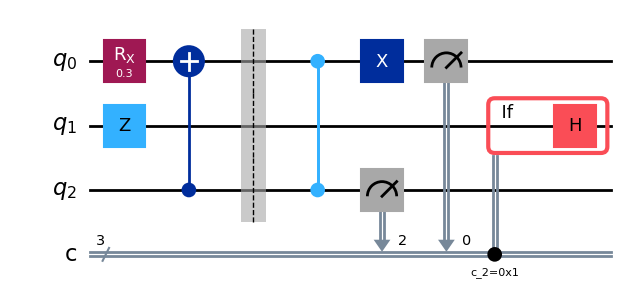

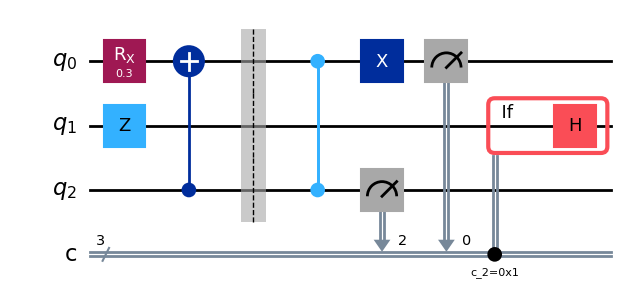

In [14]:
#Creamos el circuito
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

qc = QuantumCircuit(qr, cr, name='Circuit')
#Puertas
qc.rx(0.3, 0)#Primero el ángulo de rotación y luego el qubit
qc.z(1)
qc.cx(2,0)
qc.barrier()
qc.cz(0,2)
qc.x(0)
qc.measure([0,2],[0,2])

#Si el valor en cr[1] es 1, aplicamos una puerta x en el 2
with qc.if_test((cr[2], 1)) as else_:
    qc.h(1)

qc.draw('mpl')

## While

Ahora queremos que se vaya repitiendo una cierta estructura hasta medir 0 en el primer qubit.

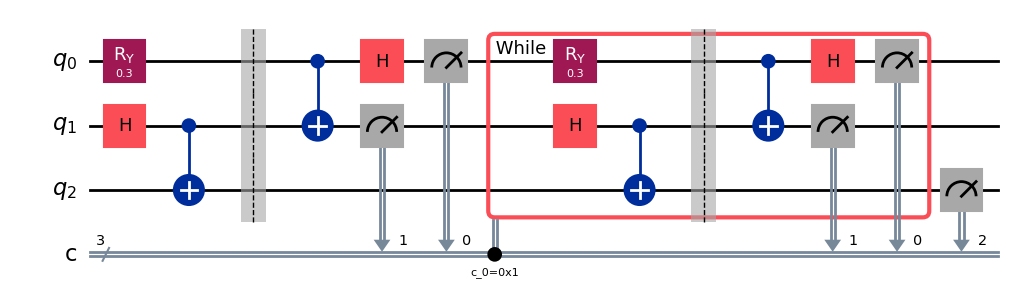

In [15]:
#Creamos el circuito
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

qc = QuantumCircuit(qr, cr, name='Circuit')
#Puertas
qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])

#Aplicamos este circuito hasta que la medida del 0 sea 0
with qc.while_loop((cr[0], 1)):
    qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])

qc.measure(2,2)
qc.draw('mpl')

### Ejercicio

Construye el siguiente circuito.

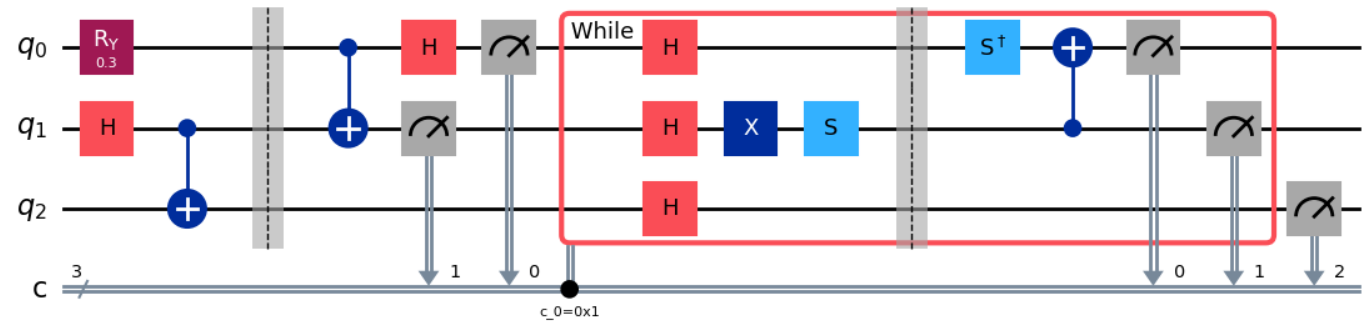

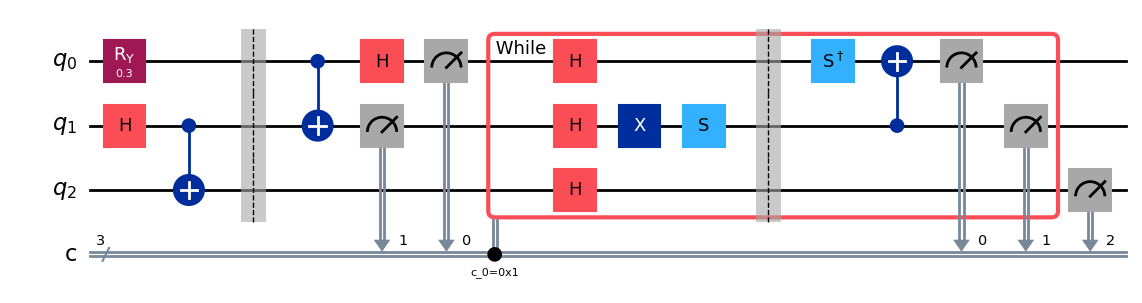

In [16]:
#Creamos el circuito
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

qc = QuantumCircuit(qr, cr, name='Circuit')
#Puertas
qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])

with qc.while_loop((cr[0], 1)):
    qc.h([0,1,2])
    qc.x(1)
    qc.s(1)
    qc.barrier()
    qc.sdg(0)
    qc.cx(1,0)
    qc.measure([0,1],[0,1])

qc.measure(2,2)
qc.draw('mpl')

---
# Funciones generadoras de circuitos

Vamos a abstraernos un poco y crear una función que, dado un input, nos genere el circuito cuántico que queremos.

En este caso empezaremos haciendo un estado GHZ de n qubits, siendo n la entrada.

In [17]:
def GHZ_circuit(n:int):
    #Creamos el registro
    qr = QuantumRegister(n, name='GHZ')
    qc = QuantumCircuit(qr, name='Circuit GHZ')

    #Puertas
    qc.h(0)
    #Posibilidad 1
    for i in range(n-1):
        qc.cx(i,i+1)

    #Posibilidad 2
    #qc.cx(range(n-1), range(1,n))

    #Devolvemos el circuito
    return qc

Comprobamos si funciona.

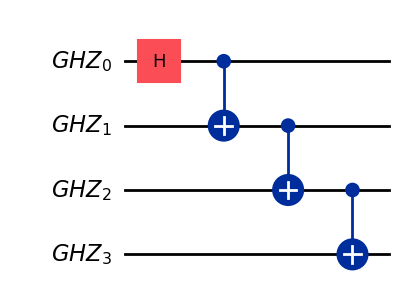

In [18]:
n = 4
qc = GHZ_circuit(n)
qc.draw('mpl')

Ahora bien, ¿y si quiero hacer que este circuito sea un operador? Lo convierto en una puerta.

In [19]:
gate = qc.to_gate()

Y ahora pruebo a añadirlo a un circuito con el append.

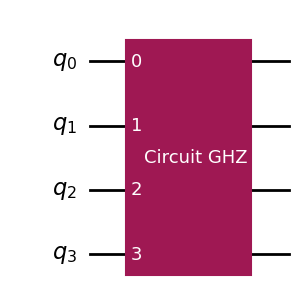

In [20]:
qc1 = QuantumCircuit(n)
#Añado la puerta
qc1.append(gate, range(n))

qc1.draw('mpl')

Podemos ver que se conserva el nombre del circuito original.

Nos gustaría saber cuales son las puertas que componen esta gate. Para eso usaremos el decompose. Primero le diremos qué puerta(s) queremos descomponer, y después el número de pasos de descomposición.

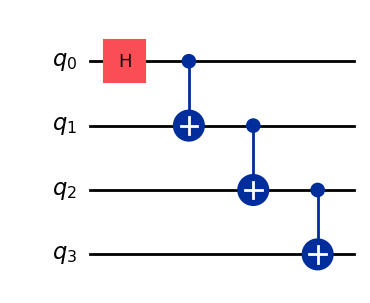

In [21]:
qc2 = qc1.decompose('Circuit GHZ', reps=1)#Descompon 'Circuit GHZ' una sola vez.
qc2.draw('mpl')

¿Y si queremos repetir un circuito varias veces? Para eso tenemos el repeat.

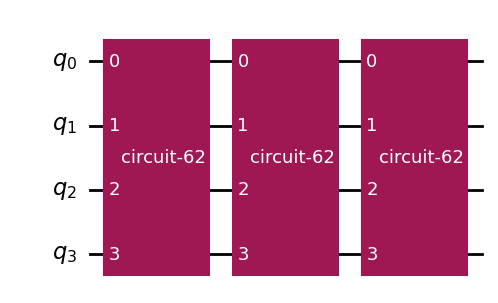

In [22]:
new_qc = qc2.repeat(3)#Cuantas veces se repite
new_qc.draw('mpl')

Podemos descomponerlo por su nombre para verlo mejor (cambia cada vez).

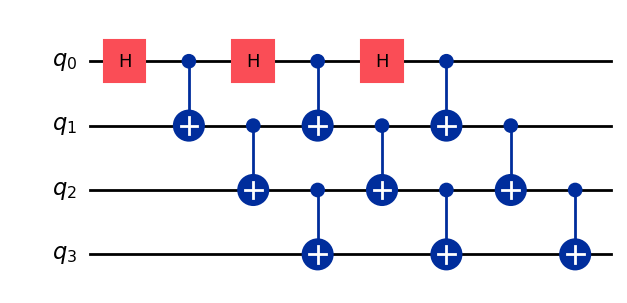

In [23]:
new_qc.decompose('circuit-62', reps=1).draw('mpl')

Si queremos aplicar la operación inversa, usamos .inverse().

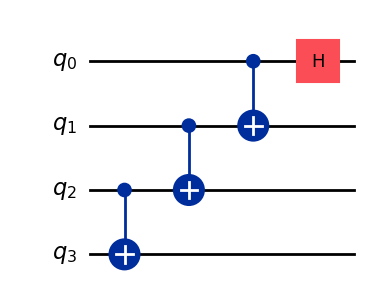

In [24]:
qc2.inverse().draw('mpl')

### Ejercicio

Implementa la siguiente puerta

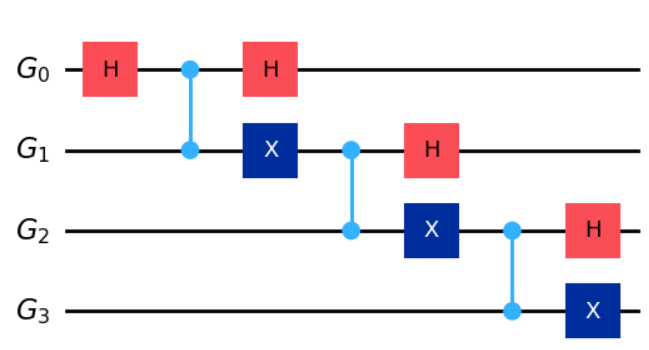

y aplica su inversa a un circuito.



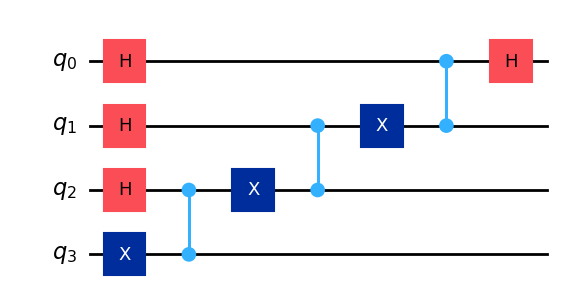

In [25]:
def Gate_circ(n:int):
    #Creamos el registro
    qr = QuantumRegister(n, name='G')
    qc = QuantumCircuit(qr, name='Gate')

    #Puertas
    qc.h(0)
    for i in range(n-1):
        qc.cz(i,i+1)
        qc.x(i+1)
        qc.h(i)


    #Devolvemos el circuito
    return qc

n = 4
qc = Gate_circ(n)

gate = qc.to_gate()

qc1 = QuantumCircuit(n)
#Añado la puerta
qc1.append(gate.inverse(), range(n))
qc1.decompose('Gate_dg', reps=1).draw('mpl')

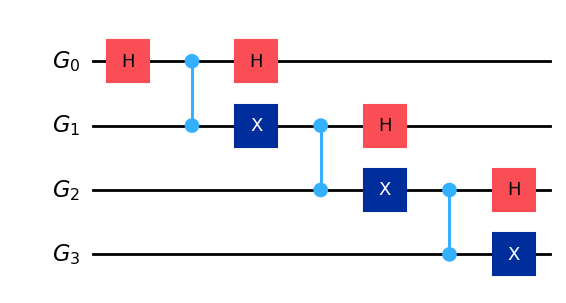

In [26]:
qc.draw('mpl')

Con esto hemos visto los aspectos fundamentales de trabajar con Qiskit, cómo hacer un circuito, cómo ponerle condiciones, cómo generarlo a partir de una función, volverlo una puerta y descomponerlo.